In [2]:
### 导入相关package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#机器学习模型：
from sklearn import linear_model

import warnings
import statsmodels
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import statsmodels
print("Statsmodels Version:", statsmodels.__version__)
#导入 train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


Statsmodels Version: 0.14.0


#stat的线性回归

In [2]:
df = pd.read_excel('D://作业//低保户//fifa_model_15.xlsx')
#查看数据
print(df.shape)
print("variables: ",list(df.columns))
df.head()

(1592, 79)
variables:  ['house_safty', 'toilet', 'toilet_three_grid_tank', 'tap_water', 'children', 'children_study', 'drop_out', 'children_study_number', 'education_subsidy', 'family_bigill_number', 'family_ill_subsidy', 'labor', 'family_population1', 'family_population2', 'labor_number1', 'labor_number2', 'work_ouside_number', 'work_ouside_long_term', 'working_willingness_number', 'unemployment_number', 'economic_crop', 'chicken_duck_goose', 'pig_cow_sheep', 'aquaculture', 'other_sidelines', 'property_income', 'training', 'training_helpful', 'assistance_activity', 'satisfy_to_governor', 'problem_solving_timely', 'assistance_policy_knowing', 'assistance_condition_knowing', 'monitoring_conditions_satisfy', 'being_monitoring_knowing', 'assistance_got_lastyear', 'visiting_from_governor', 'irrigation_facilities', 'irrigation_facilities_change', 'sanitation', 'road_condition', 'others_help_need', 'assistance_satisfy', 'assistance_satisfy_industry', 'assistance_satisfy_job', 'assistance_nee

,house_safty,toilet,toilet_three_grid_tank,tap_water,children,children_study,drop_out,children_study_number,education_subsidy,family_bigill_number,...,log转移收入,log家庭人均可支配收入,log家庭收入,log医疗补助,log医疗补助后支出,log转移支出,log家庭支出,living_stable,不同地区工作收入,labor_ritio
0,1,1,1,1,0,0,0,2,0,2,...,15.671694,13.671694,0.001000,11.402479,13.402213,0.001000,0.001000,4,无,0.25
1,1,1,1,1,0,0,0,1,0,1,...,14.764457,13.779925,0.001000,0.001000,0.001000,9.451211,0.001000,5,无,0.00
2,1,1,1,1,0,0,0,1,0,0,...,13.018896,13.799686,10.965784,5.643856,6.643856,7.491853,7.643856,1,无,0.00
3,1,1,1,1,1,1,0,1,0,2,...,14.175512,13.802302,7.906891,7.228819,9.228819,0.001000,0.001000,2,无,0.00
4,1,1,1,0,0,0,0,0,0,1,...,14.049508,14.049508,0.001000,8.228819,8.228819,0.001000,0.001000,4,无,0.00


In [5]:
X = df[['assistance_satisfy','labor_ritio','irrigation_facilities_change',"log工作收入2"] ] #自变量
y = df['living_stable'] # 因变量
X = sm.add_constant(X) # 加入截距项
mstats = sm.OLS(y, X).fit() #构建ols回归模型并拟合
print(mstats.summary())

df['mstatsy']= mstats.predict() 

                            OLS Regression Results                            
Dep. Variable:          living_stable   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     27.53
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           3.98e-22
Time:                        10:50:59   Log-Likelihood:                -2148.3
No. Observations:                1592   AIC:                             4307.
Df Residuals:                    1587   BIC:                             4333.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

###多元线性回归
# statsmodels统计模型
X = df[['assistance_satisfy','log工作收入1','irrigation_facilities_change'] ] #自变量
y = df['living_stable'] # 因变量
X = sm.add_constant(X) # 加入截距项
mstats = sm.OLS(y, X).fit() #构建ols回归模型并拟合
print(mstats.summary())
预测y值：
df['mstatsy']= mstats.predict() 

In [8]:
predy = mstatsy.predict() 
df['mstatsy']=predy
df.head(1)

NameError: name 'mstatsy' is not defined

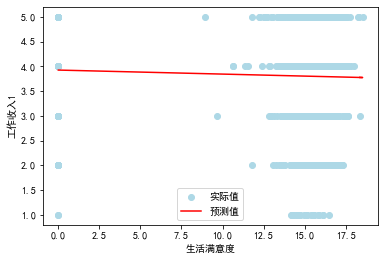

In [12]:
# 画图看拟合情况：

# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
y = df['living_stable']  #因变量是数据df中的wt这一列
x = df['log工作收入1'] 
plt.scatter(x, y, color = 'lightblue',label='实际值') # 散点图
plt.plot(x, predy, color = 'red', label='预测值') #回归直线
plt.xlabel("生活满意度") #行标签
plt.ylabel("工作收入1") #列标签
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形


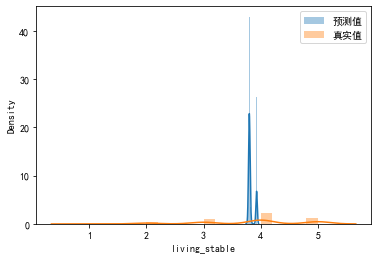

In [15]:
#真实值与预测值分布图
# 预测值和真实值对比
df[['statswt','living_stable']].describe()
# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

sns.distplot(df['statswt'],bins=20,label='预测值')
sns.distplot(df['living_stable'],bins=20,label='真实值')
plt.legend()
plt.show()

sklrean的线性回归

In [20]:
#训练ols模型
sklm= linear_model.LinearRegression()
y = df['living_stable']  #因变量是数据df中的wt这一列
x = df[['log工作收入1']] 
import numpy as np


#拟合模型
sklm.fit(x, y)
intercept=sklm.intercept_  #截距
coef=sklm.coef_ #线性模型的系数
R2=sklm.score(x,y)

print("intercept: ",intercept, "coef: ",coef,"R2: ", R2)

intercept:  3.926932028397353 coef:  [-0.00813873] R2:  0.0027924482935113293


# sklearn模型
msklm= linear_model.LinearRegression()
X = df[['gender','age','edu'] ] #自变量
y = df['lnincm'] # 因变量
msklm.fit(X, y)
intercept=msklm.intercept_  #截距
coef=msklm.coef_ #线性模型的系数
R2m=msklm.score(X,y)
print("intercept: ",intercept,"\n", "coef: ",coef, "\n", "R2: ", R2m)

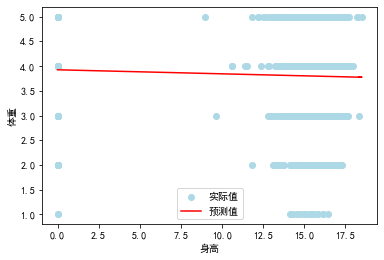

In [22]:
predy = sklm.predict(x) 
df['sklmwt']=predy
# 画图看拟合情况：
# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(df['log工作收入1'], df['living_stable'], color = 'lightblue',label='实际值') # 散点图
plt.plot(df['log工作收入1'], df['sklmwt'], color = 'red', label='预测值') #回归直线
plt.xlabel("身高") #行标签
plt.ylabel("体重") #列标签
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.show() # 显示图形

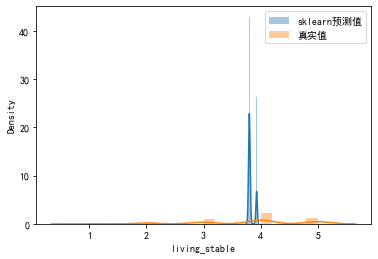

In [23]:
# sklearn模型预测值，真实值，statsmodels模型预测值对比
df[['sklmwt','living_stable','statswt']].describe()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


sns.distplot(df['statswt'],bins=20,label='sklearn预测值')
sns.distplot(df['living_stable'],bins=20,label='真实值')

plt.legend()
plt.show()

检验
13	family_population2	-2.536762e-01
25	property_income	2.592886e-06
50	work_at_village_income1	-5.720938e-07
51	最终核实人口数	-4.823595e-04
52	核对财产性收入	1.984106e-07
53	X.转移性.支出	-7.623079e-07
61	log在省工作收入1	5.974868e-03
62	log务工收入合计	1.794617e-02
64	log家庭可支配收入	5.549222e-01
66	log转移收入	-6.135227e-03
68	log医疗补助后支出	-4.862377e-03

In [60]:
df

,house_safty,toilet,toilet_three_grid_tank,tap_water,children,children_study,drop_out,children_study_number,education_subsidy,family_bigill_number,...,不同地区工作收入_无,不同地区工作收入_村,不同地区工作收入_省,不同地区工作收入_镇,不同地区工作收入_家,不同地区工作收入_市,不同地区工作收入_无,不同地区工作收入_村,不同地区工作收入_省,不同地区工作收入_镇
0,1,1,1,1,0,0,0,2,0,2,...,True,False,False,False,False,False,True,False,False,False
1,1,1,1,1,0,0,0,1,0,1,...,True,False,False,False,False,False,True,False,False,False
2,1,1,1,1,0,0,0,1,0,0,...,True,False,False,False,False,False,True,False,False,False
3,1,1,1,1,1,1,0,1,0,2,...,True,False,False,False,False,False,True,False,False,False
4,1,1,1,0,0,0,0,0,0,1,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,1,1,1,1,1,1,0,3,0,0,...,False,False,False,False,True,False,False,False,False,False
1588,1,1,1,1,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,False
1589,1,1,1,1,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,False
1590,1,1,1,1,0,0,0,0,0,0,...,False,False,True,False,False,False,False,False,True,False


In [49]:

# 创建一个映射字典
mapping = {'低保贫困户': 0, '一般贫困户': 1, '五保贫困户': 2}  # 根据你的实际情况添加更多的映射

# 使用 map 函数将字符串列映射为数值列
#df['户主贫困属性code'] = df[''].map(mapping)
import pandas as pd


# 使用get_dummies进行独热编码
df不同地区工作收入  = pd.get_dummies(df, columns=['不同地区工作收入'])
# 将独热编码后的列添加回原始DataFrame
df = pd.concat([df, df不同地区工作收入], axis=1)

# 打印包含独热编码列的新DataFrame
print(df)




      house_safty  toilet  toilet_three_grid_tank  tap_water  children  \
0               1       1                       1          1         0   
1               1       1                       1          1         0   
2               1       1                       1          1         0   
3               1       1                       1          1         1   
4               1       1                       1          0         0   
...           ...     ...                     ...        ...       ...   
1587            1       1                       1          1         1   
1588            1       1                       1          1         0   
1589            1       1                       1          1         0   
1590            1       1                       1          1         0   
1591            1       1                       1          1         0   

      children_study  drop_out  children_study_number  education_subsidy  \
0                  0         0     

In [65]:
from sklearn.preprocessing import LabelEncoder

# 创建一个 LabelEncoder 对象
label_encoder = LabelEncoder()

# 使用 LabelEncoder 对象对字符串列进行编码
df['户主贫困属性-code'] = label_encoder.fit_transform(df['户主贫困属性'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# 输出映射关系
print(mapping)


{'一般贫困户': 0, '五保贫困户': 1, '低保贫困户': 2, nan: 3}


In [72]:
print(df.columns)
df = df.dropna()

print(df)
#定义feature 和 label
#feature=['age', 'gender', 'isco08', 'manage','dwtype', 'tizhi', 'party', 'hukou', 'wide', 'nwtop', 'edu',
    #   'listening', 'work_at_village_income1','speaking', 'book', 'newsp', 'eread', 'isei08', 'siops08','ht', 'wt', 'rd1', 'rd2', 'rd3']
#label=['lnincm']
feature=['house_safty', 'toilet', 'toilet_three_grid_tank', 'tap_water',
       'children', 'children_study', 'drop_out', 'children_study_number',
       'education_subsidy', 'family_bigill_number', 'family_ill_subsidy',
       'labor',  'work_ouside_number', 'work_ouside_long_term',
       'working_willingness_number', 'unemployment_number', 'economic_crop',
       'chicken_duck_goose', 'pig_cow_sheep', 'aquaculture', 'other_sidelines',
        'training', 'training_helpful',
       'assistance_activity', 'satisfy_to_governor', 'problem_solving_timely',
       'assistance_policy_knowing', 'assistance_condition_knowing',
       'monitoring_conditions_satisfy', 'being_monitoring_knowing',
       'assistance_got_lastyear', 'visiting_from_governor',
       'irrigation_facilities', 'irrigation_facilities_change', 'sanitation',
       'road_condition', 'others_help_need', 'assistance_satisfy',
       'assistance_satisfy_industry', 'assistance_satisfy_job',
       'assistance_needed_education', 'assistance_needed_medical',
       'assistance_needed_job', 'assistance_needed_diwubao',
       'assistance_needed_others',  '最终核实人口数', 'log家庭经营支出', 'log工作收入1',
       'log工作收入2', 'log在county工作收入1', 'log在家工作收入', 'log在城市工作收入', 'log在镇工作收入',
       'log在省工作收入1', 'log务工收入合计', 'log项目收入', 'log合计转移性收入',
       'log转移收入',  'log医疗补助', 'log医疗补助后支出',
       'log转移支出',  'labor_ritio','户主贫困属性-code','户类型-code','城市-code','不同地区工作收入-code']
       #'户主贫困属性_一般贫困户','户主贫困属性_五保贫困户','户主贫困属性_低保贫困户','不同地区工作收入_村',
       #'不同地区工作收入_家','不同地区工作收入_省','不同地区工作收入_市', '不同地区工作收入_无','不同地区工作收入_镇', '户类型-code','不同地区工作收入-code']
       #'statswt', 'sklmwt']
label=['log家庭人均可支配收入']
inputs=df[feature]
labels=df[label]
#living_stable , '核对财产性收入','log家庭人均可支配收入', 'X.转移性.支出', 'log家庭收入','property_income','log家庭可支配收入', 'log家庭支出''family_population1', 'family_population2', 'labor_number1', 'labor_number2',
#划分训练集和测试集
(train_X,
 test_X,
 train_y,
 test_y) = train_test_split(inputs, labels, train_size=0.3, random_state=5029)

#看一下数据集长什么样子
print(train_X.shape,test_X.shape,)
train_X.head(1)
import pandas as pd





Index(['house_safty', 'toilet', 'toilet_three_grid_tank', 'tap_water',
       'children', 'children_study', 'drop_out', 'children_study_number',
       'education_subsidy', 'family_bigill_number', 'family_ill_subsidy',
       'labor', 'family_population1', 'family_population2', 'labor_number1',
       'labor_number2', 'work_ouside_number', 'work_ouside_long_term',
       'working_willingness_number', 'unemployment_number', 'economic_crop',
       'chicken_duck_goose', 'pig_cow_sheep', 'aquaculture', 'other_sidelines',
       'property_income', 'training', 'training_helpful',
       'assistance_activity', 'satisfy_to_governor', 'problem_solving_timely',
       'assistance_policy_knowing', 'assistance_condition_knowing',
       'monitoring_conditions_satisfy', 'being_monitoring_knowing',
       'assistance_got_lastyear', 'visiting_from_governor',
       'irrigation_facilities', 'irrigation_facilities_change', 'sanitation',
       'road_condition', 'others_help_need', 'assistance_satisfy'

In [73]:
# 用训练集数据训练线性回归模型
msklm_tr= linear_model.LinearRegression()
X = train_X[['gender','age','edu'] ] #自变量
y = train_y['lnincm'] # 因变量
msklm_tr.fit(X, y)
intercept=msklm_tr.intercept_  #截距
coef=msklm_tr.coef_ #线性模型的系数
#预测Y值
y_tr=msklm_tr.predict(X)
#R2
R2m_tr=msklm_tr.score(X,y)
#MSE
mse_tr=MSE(train_y['lnincm'],y_tr)

print("intercept: ",intercept,"\n", "coef: ",coef, "\n", "R2: ", R2m_tr,'\n' "MSE_train: ",mse_tr)
#用训练好的模型来拟合测试集的数据
X_te = test_X[['gender','age','edu'] ] #自变量
y_te1 = test_y
msklm_tr.fit(X_te,y_te1) 
y_te=msklm_tr.predict(X_te)
#模型评估
#R2
R2m_te=msklm_tr.score(X_te,test_y['lnincm'])
#MSE
mse_te=MSE(test_y['lnincm'],y_te)
print(" 训练集R2: ",R2m_tr,'\n',
      "测试集R2: ", R2m_te ,'\n',
      "训练集MSE: ",mse_tr,"\n",
      "测试集MSE: ",mse_te,"\n")

KeyError: "None of [Index(['gender', 'age', 'edu'], dtype='object')] are in the [columns]"

# lao变量选择

使用循环，按不同比例划分训练集和测试集，使用不同的alpha取值来训练lasso回归模型，并找出结果最好的模型变量选择

In [74]:
nan=[]
for i in df.columns:
   # print(i,data[i].isnull().values.any())
    nan.append(df[i].isnull().values.any())
print(set(nan))

{False}


In [75]:

#sklearn中的linear_model下的一个子模块
#我们将所有feature中的自变量都放进去
lso = linear_model.Lasso(alpha=0.1) #定义模型 （alpha规定惩罚力度的大小，默认为1，如果alpha=0，则等价于普通回归）
lso.fit(inputs,labels) #用lso拟合数据
y_pr=lso.predict(inputs)

for i,j in zip(list(inputs.columns),lso.coef_):
    print(i,j)
print("截距：",lso.intercept_,'\n',
      "R2:",lso.score(inputs,labels),'\n',
       "MSE:",MSE(labels,y_pr))

house_safty -0.0
toilet 0.0
toilet_three_grid_tank 0.0
tap_water 0.0
children -0.0
children_study -0.0
drop_out -0.0
children_study_number -0.07385841924822899
education_subsidy -0.0
family_bigill_number -0.0
family_ill_subsidy -0.0
labor 0.0
work_ouside_number 0.03529817029665838
work_ouside_long_term -0.0
working_willingness_number 0.02487074593930854
unemployment_number -0.0
economic_crop -0.0
chicken_duck_goose -0.0
pig_cow_sheep 0.0
aquaculture 0.0
other_sidelines -0.0
training 0.0
training_helpful 0.0
assistance_activity 0.0
satisfy_to_governor -0.0
problem_solving_timely 0.0
assistance_policy_knowing 0.0
assistance_condition_knowing -0.0
monitoring_conditions_satisfy -0.0
being_monitoring_knowing 0.0
assistance_got_lastyear -0.0
visiting_from_governor 0.0
irrigation_facilities -0.0
irrigation_facilities_change -0.0
sanitation 0.0
road_condition 0.0
others_help_need 0.0
assistance_satisfy 0.0
assistance_satisfy_industry -0.0
assistance_satisfy_job 0.0
assistance_needed_education 

In [76]:
#改变alpha
lso = linear_model.Lasso(alpha=1) #定义模型 （alpha规定惩罚力度的大小，默认为1，如果alpha=0，则等价于普通回归）
lso.fit(inputs,labels) #用lso拟合数据
y_pr=lso.predict(inputs)

for i,j in zip(list(inputs.columns),lso.coef_):
    print(i,j)
print("截距：",lso.intercept_,'\n',
      "R2:",lso.score(inputs,labels),'\n',
       "MSE:",MSE(labels,y_pr))

#改变alpha
lso = linear_model.Lasso(alpha=0.1) #定义模型 （alpha规定惩罚力度的大小，默认为1，如果alpha=0，则等价于普通回归）
lso.fit(inputs,labels) #用lso拟合数据
y_pr=lso.predict(inputs)

for i,j in zip(list(inputs.columns),lso.coef_):
    print(i,j)
print("截距：",lso.intercept_,'\n',
      "R2:",lso.score(inputs,labels),'\n',
       "MSE:",MSE(labels,y_pr))

house_safty -0.0
toilet 0.0
toilet_three_grid_tank 0.0
tap_water 0.0
children -0.0
children_study -0.0
drop_out -0.0
children_study_number -0.0
education_subsidy -0.0
family_bigill_number -0.0
family_ill_subsidy -0.0
labor 0.0
work_ouside_number 0.0
work_ouside_long_term 0.0
working_willingness_number 0.0
unemployment_number -0.0
economic_crop -0.0
chicken_duck_goose -0.0
pig_cow_sheep 0.0
aquaculture 0.0
other_sidelines -0.0
training 0.0
training_helpful 0.0
assistance_activity 0.0
satisfy_to_governor -0.0
problem_solving_timely 0.0
assistance_policy_knowing 0.0
assistance_condition_knowing -0.0
monitoring_conditions_satisfy -0.0
being_monitoring_knowing 0.0
assistance_got_lastyear -0.0
visiting_from_governor -0.0
irrigation_facilities -0.0
irrigation_facilities_change -0.0
sanitation 0.0
road_condition 0.0
others_help_need 0.0
assistance_satisfy 0.0
assistance_satisfy_industry -0.0
assistance_satisfy_job 0.0
assistance_needed_education -0.0
assistance_needed_medical -0.0
assistance_n

In [77]:
#把变量名和系数储存成dataframe方便查看
df_coef=pd.DataFrame(list(zip(list(inputs.columns),lso.coef_)), 
                     columns = ['variables', 'coef'])
#变量选择：保留变量系数不为0 的
df_coef.loc[df_coef['coef']!=0]

,variables,coef
7,children_study_number,-0.073858
12,work_ouside_number,0.035298
14,working_willingness_number,0.024871
45,最终核实人口数,-0.093032
46,log家庭经营支出,0.008594
51,log在城市工作收入,0.000062
53,log在省工作收入1,0.013619
54,log务工收入合计,0.058999
55,log项目收入,0.000953
57,log转移收入,-0.001353


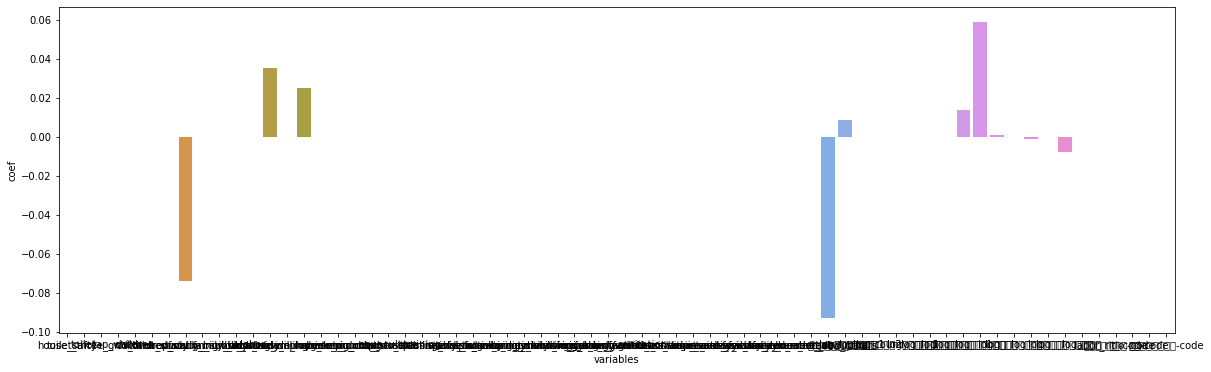

In [78]:
plt.figure(figsize=(20,6))
sns.barplot(df_coef['variables'],df_coef['coef'])
plt.show()

In [79]:
 #使用循环来定义多个alpha取值，
for i in np.linspace(0.01,0.5,10):    #生成一个[0.1,0.5]之间的一个10个元素的线性序列  
    print("当alpha=",i,"时")
    lasso = linear_model.Lasso(alpha = i)    
    lasso.fit(inputs,labels)   
    pry=lasso.predict(inputs)
#     for n,m in zip(list(inputs.columns),lso.coef_):  
#         print(n,m)      #打印每一个alpha取值下的变量系数
    print("截距：",lso.intercept_,'\n',
          "R2:",lso.score(inputs,labels),'\n',
           "MSE:",MSE(labels,pry),'\n','\n')  

当alpha= 0.01 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.2567292188773186 
 

当alpha= 0.06444444444444444 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.27913951820707167 
 

当alpha= 0.11888888888888888 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.3125185954473991 
 

当alpha= 0.17333333333333334 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.3326710436145631 
 

当alpha= 0.22777777777777777 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.35420029896049965 
 

当alpha= 0.2822222222222222 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.36857102999665353 
 

当alpha= 0.33666666666666667 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.3855565440747052 
 

当alpha= 0.3911111111111111 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.39499224492524837 
 

当alpha= 0.44555555555555554 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.39659052499078806 
 

当alpha= 0.5 时
截距： [13.65467227] 
 R2: 0.4683629437255197 
 MSE: 0.3983968074963819 
 

In [86]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as MSE

# 创建一个空的DataFrame来存储结果
results_df = pd.DataFrame(columns=['Alpha', 'Intercept', 'R2', 'MSE'])

# 使用循环来定义多个alpha取值
alphas = np.linspace(0.01, 0.5, 10)

for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(inputs, labels)
    predictions = lasso.predict(inputs)
    r2 = lasso.score(inputs, labels)
    mse = MSE(labels, predictions)
    
    # 将结果添加到DataFrame中
results_df = results_df.append({'Alpha': alpha, 'Intercept': lasso.intercept_, 'R2': r2, 'MSE': mse}, ignore_index=True)

# 打印结果表格
print(results_df)


AttributeError: 'DataFrame' object has no attribute 'append'

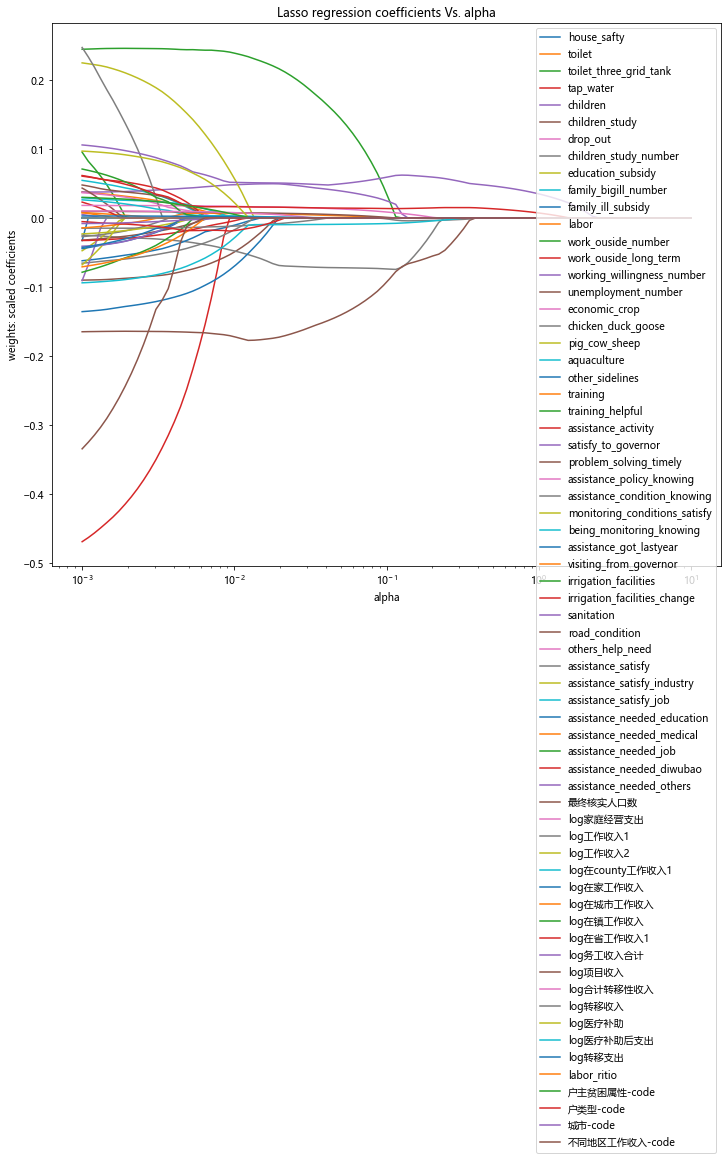

In [80]:
#不同lambda对应的系数值
alpha_lasso = 10**np.linspace(-3,1,100)
lasso = linear_model.Lasso()
coefs_lasso = []


for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(inputs,labels)
    coefs_lasso.append(lasso.coef_)

plt.rcParams['font.sans-serif']=['Microsoft YaHei']   
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(feature,loc="upper right")

plt.show()


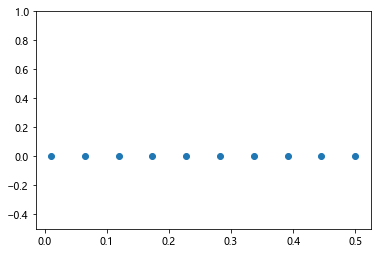

In [81]:
#生成等差数列：
al = np.linspace(0.01,0.5,10)
y = np.zeros(10)
plt.ylim([-0.5, 1])
plt.plot(al,y,'o')
plt.show()

# 异质性回归

In [83]:
from sklearn.preprocessing import LabelEncoder

# 创建一个 LabelEncoder 对象
label_encoder = LabelEncoder()

# 使用 LabelEncoder 对象对字符串列进行编码
df['城市-code'] = label_encoder.fit_transform(df['城市'])
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# 输出映射关系
print(mapping)

{'云浮市': 0, '湛江市': 1, '肇庆市': 2, '茂名市': 3, '阳江市': 4}


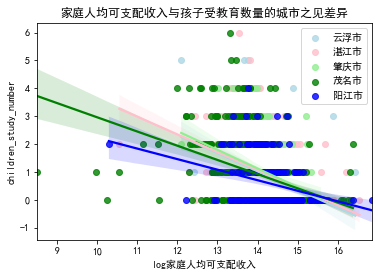

In [92]:
#男性和女性教育回报的差异
#有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
d1=df.loc[df['城市-code']==0]
d2=df.loc[df['城市-code']==1]
d3=df.loc[df['城市-code']==2]
d4=df.loc[df['城市-code']==3]
d5=df.loc[df['城市-code']==4]
sns.regplot(d1['log家庭人均可支配收入'],d1['children_study_number'] , color = 'lightblue',label='云浮市') # 散点图
sns.regplot(d2['log家庭人均可支配收入'],d2['children_study_number'], color = 'pink', label='湛江市') #回归直线
sns.regplot(d3['log家庭人均可支配收入'],d3['children_study_number'] , color = 'lightgreen',label='肇庆市') # 散点图
sns.regplot(d4['log家庭人均可支配收入'],d4['children_study_number'], color = 'green', label='茂名市') #回归直线
sns.regplot(d5['log家庭人均可支配收入'],d5['children_study_number'] , color = 'blue',label='阳江市') # 散点图
#sns.regplot(d2['log家庭人均可支配收入'],d2['children_study_number'], color = 'red', label='稳定性好') #回归直线
# plt.xlabel("") #行标签
# plt.ylabel("体重") #列标签
plt.legend() # 显示图例，即每条线对应 label 中的内容
plt.title('家庭人均可支配收入与孩子受教育数量的城市之见差异')
plt.show() # 显示图形

##还不足，有<font color=black size=4 face=雅黑>**sklear中的10种聚类算法：**</font>


    K-Means
    Mini-Batch K-Means
    Mean Shift
    Affinity Propagation
    Agglomerative Clustering
    BIRCH
    DBSCAN
    OPTICS
    Spectral Clustering
    Mixture of Gaussians

clusetring的9种：https://scikit-learn.org/stable/modules/clustering.html

高斯混合：https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture


十种聚类算法的介绍：https://machinelearningmastery.com/clustering-algorithms-with-python/

常见的三种评估聚类性能的内部指标：
https://blog.csdn.net/qq_27825451/article/details/94436488

# 数据处理

In [142]:
print(df.columns)
#数据 ： 原始数据去掉rd1,rd2,rd3(随机生成的变量)和id，生成新的数据
#'living_stable', 
data=df[['irrigation_facilities_change', 'log医疗补助后支出', 'log工作收入2', 'log在省工作收入1', 'log在镇工作收入', 'log家庭收入', 'log务工收入合计', 'labor_ritio',  
        'training', 'satisfy_to_governor', 'problem_solving_timely',
       'assistance_policy_knowing', 'assistance_condition_knowing',
       'monitoring_conditions_satisfy', 'being_monitoring_knowing',
       'assistance_got_lastyear', 'visiting_from_governor', ]]
data.shape
data.columns
#聚类模型不允许存在缺失值，先检查缺失值
nan=[]
for i in data.columns:
   # print(i,data[i].isnull().values.any())
    nan.append(data[i].isnull().values.any())
print(set(nan))


Index(['house_safty', 'toilet', 'toilet_three_grid_tank', 'tap_water',
       'children', 'children_study', 'drop_out', 'children_study_number',
       'education_subsidy', 'family_bigill_number', 'family_ill_subsidy',
       'labor', 'family_population1', 'family_population2', 'labor_number1',
       'labor_number2', 'work_ouside_number', 'work_ouside_long_term',
       'working_willingness_number', 'unemployment_number', 'economic_crop',
       'chicken_duck_goose', 'pig_cow_sheep', 'aquaculture', 'other_sidelines',
       'property_income', 'training', 'training_helpful',
       'assistance_activity', 'satisfy_to_governor', 'problem_solving_timely',
       'assistance_policy_knowing', 'assistance_condition_knowing',
       'monitoring_conditions_satisfy', 'being_monitoring_knowing',
       'assistance_got_lastyear', 'visiting_from_governor',
       'irrigation_facilities', 'irrigation_facilities_change', 'sanitation',
       'road_condition', 'others_help_need', 'assistance_satisfy'

In [143]:
# 导入sklearn中的数据处理函数中的标准化函数
from sklearn.preprocessing import scale  # z-score标准化
from sklearn.preprocessing import MinMaxScaler # 离差标准化
#scale函数可以直接对dataframe进行标准化，得到一个numpy数组
scale(data) #得到的是一个numpy数组，我们将其转化为df方便查看
datastd=pd.DataFrame(scale(data),columns=list(data.columns))
#MinMaxScaler使用方法一样，sklearn.preprocessing给出了很多标准化、正则化的方法

In [144]:
print(datastd.isnull().sum())


irrigation_facilities_change     0
log医疗补助后支出                       0
log工作收入2                         0
log在省工作收入1                       0
log在镇工作收入                        0
log家庭收入                          0
log务工收入合计                        0
labor_ritio                      0
training                         0
satisfy_to_governor              0
problem_solving_timely           0
assistance_policy_knowing        0
assistance_condition_knowing     0
monitoring_conditions_satisfy    0
being_monitoring_knowing         0
assistance_got_lastyear          0
visiting_from_governor           0
dtype: int64


In [145]:
datastd.head(2)

,irrigation_facilities_change,log医疗补助后支出,log工作收入2,log在省工作收入1,log在镇工作收入,log家庭收入,log务工收入合计,labor_ritio,training,satisfy_to_governor,problem_solving_timely,assistance_policy_knowing,assistance_condition_knowing,monitoring_conditions_satisfy,being_monitoring_knowing,assistance_got_lastyear,visiting_from_governor
0,0.466240,1.250051,-2.175914,-0.713333,-0.388196,-0.92789,-2.166176,-0.579843,-0.964308,0.08009,0.256704,0.590844,0.723395,-0.320313,-1.46316,2.358994,0.209552
1,-2.507463,-1.990213,-2.175914,-0.713333,-0.388196,-0.92789,-2.166176,-1.441374,-0.964308,0.08009,0.256704,0.590844,0.723395,-0.320313,-1.46316,2.358994,0.209552


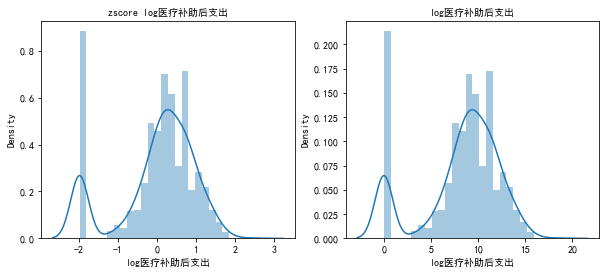

-2.4454625704936526e-16 1.0003188267257765 8.232203187231253 4.137157917051009


In [146]:
#标准化后的年龄分布
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
sns.distplot(datastd['log医疗补助后支出'],ax=ax1)
sns.distplot(data['log医疗补助后支出'],ax=ax2)
ax1.set_title ('zscore log医疗补助后支出',fontsize=10)
ax2.set_title ('log医疗补助后支出',fontsize=10)
plt.show()
print(datastd['log医疗补助后支出'].mean(),datastd['log医疗补助后支出'].std(),data['log医疗补助后支出'].mean(),data['log医疗补助后支出'].std())

##解决不了的k聚类

In [72]:
# 导入packages
import numpy as np
from sklearn.cluster import KMeans

from sklearn import mixture #导入聚类包
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering
#聚类指标评估  轮廓系数、CH得分，DBI
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
# 导入所需的库
from sklearn.cluster import KMeans

# 创建 K-Means 模型并拟合数据
kmeans = KMeans(n_clusters=3, random_state=250, max_iter=3000)
df['kmeans'] = kmeans.fit_predict(df[['irrigation_facilities_change', 'log医疗补助后支出', 'log工作收入2', 'log在省工作收入1', 'log在镇工作收入', 'log家庭收入', 'log务工收入合计', 'labor_ritio', 'living_stable',  
        'training', 'satisfy_to_governor', 'problem_solving_timely',
       'assistance_policy_knowing', 'assistance_condition_knowing',
       'monitoring_conditions_satisfy', 'being_monitoring_knowing',
       'assistance_got_lastyear', 'visiting_from_governor']])  # 替换 '特征1', '特征2', ... 为你的特征列

# 打印或查看新的数据框
print(df.head())

df['kmeans'].unique()

##凝结聚类

In [69]:
#规定距离测量方式affinity
distances=[ 'euclidean', 'manhattan', 'cosine']   #L1 L2距离分别等价于曼哈顿和欧式距离，不再重复

#规定合并时依据的簇间距离测量方式：linkage
linkages=['single','average','complete']  #ward只能用于欧式距离

#不同距离测量，average linkage
for d in distances:
    hierachical=AgglomerativeClustering(n_clusters=3,affinity=d,linkage='average').fit(data.values)
    #模型评估
    ksh=silhouette_score(datastd.values,hierachical.labels_)   #轮廓系数越大越好
    kch=calinski_harabasz_score(datastd.values,hierachical.labels_)  #ch得分越大越好
    kdbi=davies_bouldin_score(datastd.values,hierachical.labels_)  #DBI越小越好
    print('距离测量: ',d,'\n','nclusters:',3,'linkage: average',
         '轮廓系数： ',ksh, 'CH-score: ',kch, 'DBI: ',kdbi)

print('\n')
#不同合并方式，euclidean distance
for l in linkages:
    hierachical=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage=l).fit(data.values)
    #模型评估
    ksh=silhouette_score(datastd.values,hierachical.labels_)   #轮廓系数越大越好
    kch=calinski_harabasz_score(datastd.values,hierachical.labels_)  #ch得分越大越好
    kdbi=davies_bouldin_score(datastd.values,hierachical.labels_)  #DBI越小越好
    print('linkage:',l,'\n','nclusters:',3,'距离测量:','euclidean',
         '轮廓系数:',ksh, 'CH-score:',kch, 'DBI:',kdbi)


距离测量:  euclidean 
 nclusters: 3 linkage: average 轮廓系数：  0.11911753487679075 CH-score:  186.08916079894823 DBI:  2.615448330574273
距离测量:  manhattan 
 nclusters: 3 linkage: average 轮廓系数：  0.11911753487679075 CH-score:  186.08916079894823 DBI:  2.615448330574273
距离测量:  cosine 
 nclusters: 3 linkage: average 轮廓系数：  0.15771102374216597 CH-score:  125.8770736238316 DBI:  2.3352672463428266


linkage: single 
 nclusters: 3 距离测量: euclidean 轮廓系数: 0.08581765244131152 CH-score: 119.1545674797198 DBI: 2.0424365002070783
linkage: average 
 nclusters: 3 距离测量: euclidean 轮廓系数: 0.11911753487679075 CH-score: 186.08916079894823 DBI: 2.615448330574273
linkage: complete 
 nclusters: 3 距离测量: euclidean 轮廓系数: 0.17726577195957852 CH-score: 186.45088419818808 DBI: 2.0936488495429924


In [70]:
# 不同距离，不同合并方式，不同cluser
sdf=pd.DataFrame()
for l in linkages[:]:
    for d in distances:
        for i in range(3,6):
            ag=AgglomerativeClustering(n_clusters=3,affinity=d,linkage=l).fit(datastd.values)
            ksh=silhouette_score(datastd.values,ag.labels_)   #轮廓系数越大越好
            kch=calinski_harabasz_score(datastd.values,ag.labels_)  #ch得分越大越好
            kdbi=davies_bouldin_score(datastd.values,ag.labels_)  #DBI越小越好
            print(l,d,str(i)+'clusers','轮廓系数:',ksh, 'CH-score:',kch, 'DBI:',kdbi)  

single euclidean 3clusers 轮廓系数: 0.5970180308086344 CH-score: 54.073324904451155 DBI: 0.6540552701887646
single euclidean 4clusers 轮廓系数: 0.5970180308086344 CH-score: 54.073324904451155 DBI: 0.6540552701887646
single euclidean 5clusers 轮廓系数: 0.5970180308086344 CH-score: 54.073324904451155 DBI: 0.6540552701887646
single manhattan 3clusers 轮廓系数: 0.6175571322569664 CH-score: 49.54106248076368 DBI: 0.6866529403709921
single manhattan 4clusers 轮廓系数: 0.6175571322569664 CH-score: 49.54106248076368 DBI: 0.6866529403709921
single manhattan 5clusers 轮廓系数: 0.6175571322569664 CH-score: 49.54106248076368 DBI: 0.6866529403709921
single cosine 3clusers 轮廓系数: 0.22385982711705643 CH-score: 53.721223402856815 DBI: 0.6648293342604382
single cosine 4clusers 轮廓系数: 0.22385982711705643 CH-score: 53.721223402856815 DBI: 0.6648293342604382
single cosine 5clusers 轮廓系数: 0.22385982711705643 CH-score: 53.721223402856815 DBI: 0.6648293342604382
average euclidean 3clusers 轮廓系数: 0.5970180308086344 CH-score: 54.07332490

##高斯聚类

In [ ]:
#n_components定义聚类数量
gm = GaussianMixture(n_components=3, random_state=0).fit(datastd.values)
#高斯混合聚类的标签需要先使用gm_predic预测
gm_p=gm.predict(datastd.values)
ksh=silhouette_score(datastd.values,gm_p)   #轮廓系数越大越好
kch=calinski_harabasz_score(datastd.values,gm_p)  #ch得分越大越好
kdbi=davies_bouldin_score(datastd.values,gm_p)  
print(gm,ksh,kch,kdbi)

# 森林

In [93]:
#导入决策树-分类树
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [148]:
# 使用决策树预测kmeans聚类的类别
df['living_stable'].unique()
#划分数据集
# 假设'y_variable'是你的y变量列名

all_inputs =df[list(data.columns)].values
all_classes =df['living_stable'].values
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)

#定义决策树模型
decision_tree_classifier = DecisionTreeClassifier(random_state=210)
#在训练集上训练模型
decision_tree_classifier.fit(training_inputs, training_classes)
#在测试集上测试
# Validate the classifier on the testing set using classification accuracy
s=decision_tree_classifier.score(testing_inputs, testing_classes)  #在测试集上的准确性
print(s)


0.34394904458598724


In [150]:
data.columns

Index(['irrigation_facilities_change', 'log医疗补助后支出', 'log工作收入2', 'log在省工作收入1',
       'log在镇工作收入', 'log家庭收入', 'log务工收入合计', 'labor_ritio', 'training',
       'satisfy_to_governor', 'problem_solving_timely',
       'assistance_policy_knowing', 'assistance_condition_knowing',
       'monitoring_conditions_satisfy', 'being_monitoring_knowing',
       'assistance_got_lastyear', 'visiting_from_governor'],
      dtype='object')

In [151]:
# 决策树具有一定的随机性，多运行几次看看

# 100个模型的预测准确率
scors=list() #定义一个空的集合来储存每次的预测准确性
for i in range(0,100):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=210)
    decision_tree_classifier = DecisionTreeClassifier(random_state=i)
    #训练模型
    # Train the classifier on the training set
    decision_tree_classifier.fit(training_inputs, training_classes)
    #所得模型的准确性
    # Validate the classifier on the testing set using classification accuracy
    s=decision_tree_classifier.score(testing_inputs, testing_classes)
    scors.append(s)
    #看100次准确性的分布
scors=np.array(scors)
print(scors.mean(),scors.std())


0.3573121019108281 0.006657181508837517


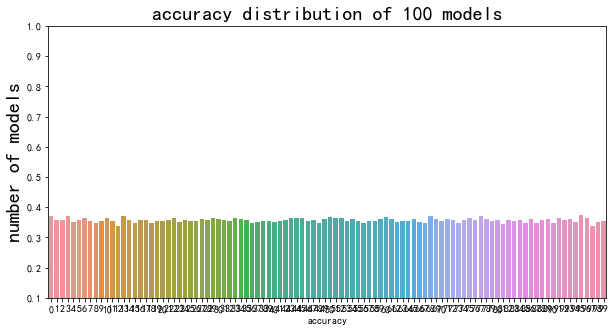

In [153]:
#预测准确性可视化
fig, (ax1) = plt.subplots(1,1, figsize=(10,5))
ax1=sns.barplot(list(range(0,100)),scors)
ax1.set_xlabel("accuracy",fontsize=10)
ax1.set_ylabel("number of models",fontsize=20)
ax1.set_title("accuracy distribution of 100 models",fontsize=20)
plt.ylim([0.1, 1])
plt.show()

In [102]:
# 可视化
from six import StringIO
import pydotplus
import graphviz
from IPython.display import Image
from sklearn import tree

In [101]:

from sklearn.tree import export_graphviz
import graphviz
import os  # 以下这两行是手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'D:\ProgramData\Anaconda3\Library\bin\Graphviz\bin'
# filled=True填充颜色


dot_data = export_graphviz(model, feature_names=Boston.feature_names, out_file=None, filled=True)
graph = graphviz.Source(dot_data)

graph.render("result")  # 导出成PDF文件
dot_data = export_graphviz(model, out_file=None, class_names=['0', '1']) 
graph = graphviz.Source(dot_data) 
graph.render('决策树可视化')

In [164]:
#区分训练集、测试集
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)

In [165]:
#----不剪枝

#定义决策树模型
dtc = DecisionTreeClassifier(random_state=20)
#在训练集上训练模型
dtc.fit(training_inputs, training_classes)
#在测试集上测试
# Validate the classifier on the testing set using classification accuracy
s=dtc.score(testing_inputs, testing_classes)  #在测试集上的准确性
print(s)

0.36560509554140125


In [166]:
# 要定义特征的标签和类别标签
data_feature_name = list(data.columns)
data_target_name = ['0','1','2','4','5']

#不剪枝
dt = tree.export_graphviz(dtc,out_file=None,
                                feature_names=data_feature_name,
                                class_names=data_target_name,
                                filled=True, 
                                rounded=True,
                                special_characters=True)
graph1 = pydotplus.graph_from_dot_data(dt)
img1 = Image(graph1.create_png())

In [167]:
graph1.write_png("pics/ot.png")


True

In [168]:
#-----剪枝
dt = DecisionTreeClassifier(random_state=20,
                            max_depth=3,         #树的最大深度
                            min_samples_split=20,  #样本数量大于多少才能进行下一步分枝
                            min_samples_leaf=10,    #叶子节点中样本数的最小值
                            min_weight_fraction_leaf=0,  #叶子节点所有样本权重和的最小值
                            max_leaf_nodes=None,   #最大的叶子节点的个数
                            min_impurity_decrease=0)   #最小的不纯度（基尼系数、信息增益等）

#训练模型
# Train the classifier on the training set
dt.fit(training_inputs, training_classes)
#所得模型的准确性
# Validate the classifier on the testing set using classification accuracy
s=dt.score(testing_inputs, testing_classes)
print(s)

0.4089171974522293


In [174]:
cut_tree = tree.export_graphviz(dt,out_file=None,
                                feature_names=data_feature_name,
                                class_names=data_target_name,filled=True, 
                                rounded=True,
                                special_characters=True)
cut_tree = tree.export_graphviz(dt, out_file=None,
                                feature_names=data_feature_name,
                                class_names=data_target_name,
                                filled=True, rounded=True,
                                special_characters=True,
                                fontname="Arial")  # 使用Arial字体
cut_tree = tree.export_graphviz(dt, out_file=None,
                                feature_names=data_feature_name,
                                class_names=data_target_name,
                                filled=True, rounded=True,
                                special_characters=True,
                                fontname="arial.ttf")  # 调整字体大小为12

graph1 = pydotplus.graph_from_dot_data(cut_tree)
img1 = Image(graph1.create_png())
graph1.write_png("pics/out1.png")



(dot.exe:16488): Pango-WARNING **: couldn't load font "arial.ttf Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


(dot.exe:28164): Pango-WARNING **: couldn't load font "arial.ttf Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



True

##还有一个回归树吼，我还要改一下数据

In [95]:
#调包
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image,display

In [145]:
#回归树
inputs=df[feature]
labels=df[label]

#划分训练集和测试集
(train_X,
 test_X,
 train_y,
 test_y) = train_test_split(inputs, labels, train_size=0.5, random_state=5029)


#定义回归决策树对象
regs = DecisionTreeRegressor(random_state=20,
                             max_depth=3,
                            min_samples_split=20,  #样本数量大于多少才能进行下一步分枝
                            min_samples_leaf=10,  )  #叶子节点中样本数的最小值)
#在训练集上训练模型
regs.fit(train_X, train_y)
#在测试集上预测y
y_pred=regs.predict(test_X)
r2 = r2_score(test_y['log家庭人均可支配收入'], y_pred)
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test_y['log家庭人均可支配收入'], y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R-squared:", r2)
print("MSE:",MSE)
print(regs.tree_)


RMSE: 0.6075920085521268
R-squared: 0.42590845122523535
MSE: <function mean_squared_error at 0x000002CC0A9C93A0>


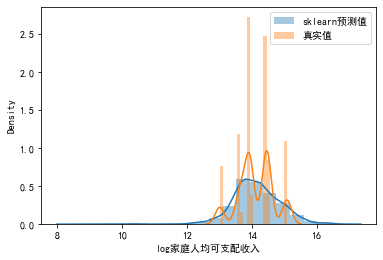

In [99]:
#真实值与预测值分布图

# 有中文时防止乱码，必写
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


sns.distplot(df['log家庭人均可支配收入'],bins=20,label='sklearn预测值')
sns.distplot(y_pred,bins=20,label='真实值')

plt.legend()
plt.show()

In [105]:
dot_data=tree.export_graphviz(regs,
               out_file=None,
               feature_names=feature,
               class_names=labels,
               filled=True,
               rounded=True,
               fontname='arial.ttf'
               )
graph2=pydotplus.graph_from_dot_data(dot_data)

img2 = Image(graph2.create_png())
graph2.write_png("pics/out2.png")


(dot.exe:31524): Pango-WARNING **: couldn't load font "arial.ttf Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.


(dot.exe:904): Pango-WARNING **: couldn't load font "arial.ttf Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



True

##随机森林图

In [106]:
#导入RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 使用决策树预测kmeans聚类的类别
data=df[['house_safty', 'toilet', 'toilet_three_grid_tank', 'tap_water',
       'children', 'children_study', 'drop_out', 'children_study_number',
       'education_subsidy', 'family_bigill_number', 'family_ill_subsidy',
       'labor',  'work_ouside_number', 'work_ouside_long_term',
       'working_willingness_number', 'unemployment_number', 'economic_crop',
       'chicken_duck_goose', 'pig_cow_sheep', 'aquaculture', 'other_sidelines',
        'training', 'training_helpful',
       'assistance_activity', 'satisfy_to_governor', 'problem_solving_timely',
       'assistance_policy_knowing', 'assistance_condition_knowing',
       'monitoring_conditions_satisfy', 'being_monitoring_knowing',
       'assistance_got_lastyear', 'visiting_from_governor',
       'irrigation_facilities', 'irrigation_facilities_change', 'sanitation',
       'road_condition', 'others_help_need', 'assistance_satisfy',
       'assistance_satisfy_industry', 'assistance_satisfy_job',
       'assistance_needed_education', 'assistance_needed_medical',
       'assistance_needed_job', 'assistance_needed_diwubao',
       'assistance_needed_others',  '最终核实人口数', 'log家庭经营支出', 'log工作收入1',
       'log工作收入2', 'log在county工作收入1', 'log在家工作收入', 'log在城市工作收入', 'log在镇工作收入',
       'log在省工作收入1', 'log务工收入合计', 'log项目收入', 'log合计转移性收入',
       'log转移收入',  'log医疗补助', 'log医疗补助后支出',
       'log转移支出',  'labor_ritio','户主贫困属性-code','户类型-code','城市-code','不同地区工作收入-code']]
#划分数据集
all_inputs =df[list(data.columns)].values
all_classes =df['log家庭人均可支配收入']

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)
#定义决策树模型
decision_tree_classifier = DecisionTreeClassifier(random_state=210)
#在训练集上训练模型
decision_tree_classifier.fit(training_inputs, training_classes)
#在测试集上测试
# Validate the classifier on the testing set using classification accuracy
s=decision_tree_classifier.score(testing_inputs, testing_classes)  #在测试集上的准确性


In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# 划分数据集
all_inputs = df[list(data.columns)].values
all_outputs = df['log家庭人均可支配收入'].values

(training_inputs, testing_inputs, training_outputs, testing_outputs) = train_test_split(
    all_inputs, all_outputs, train_size=0.5, random_state=1)

# 定义决策树回归模型
decision_tree_regressor = DecisionTreeRegressor(random_state=210)

# 在训练集上训练模型
decision_tree_regressor.fit(training_inputs, training_outputs)

# 在测试集上测试
# 使用均方根误差 (RMSE) 评估回归模型的性能
from sklearn.metrics import mean_squared_error
import numpy as np

testing_predictions = decision_tree_regressor.predict(testing_inputs)
rmse = np.sqrt(mean_squared_error(testing_outputs, testing_predictions))
print("均方根误差 (RMSE):", rmse)
#决策树特征重要性
# 决策树具有一定的随机性，多运行几次看看

# 100个模型的预测准确率
scors=list() #定义一个空的集合来储存每次的预测准确性
for i in range(0,100):
    (training_inputs,
     testing_inputs,
     training_outputs,
     texting_outputs) = train_test_split(all_inputs, all_outputs, train_size=0.5, random_state=210)

decision_tree_regressor = DecisionTreeRegressor(random_state=i)

# 训练模型
decision_tree_regressor.fit(training_inputs, training_outputs)

# 在测试集上进行预测
predictions = decision_tree_regressor.predict(testing_inputs)
# 评估模型性能
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(testing_outputs, predictions)
r2 = r2_score(testing_outputs, predictions)
scors.append(r2)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


均方根误差 (RMSE): 0.4768896417172708
Mean Squared Error: 1.13168911328844
R-squared: -0.9065515143566725


In [138]:
#看100次准确性的分布
scors=np.array(scors)
print(scors.mean(),scors.std())


-0.9065515143566725 0.0


In [ ]:
#预测准确性可视化
fig, (ax1) = plt.subplots(1,1, figsize=(10,5))
ax1=sns.barplot(list(range(0,100)),scors)
ax1.set_xlabel("accuracy",fontsize=10)
ax1.set_ylabel("number of models",fontsize=20)
ax1.set_title("accuracy distribution of 100 models",fontsize=20)
plt.ylim([0.5, 1])
plt.show()

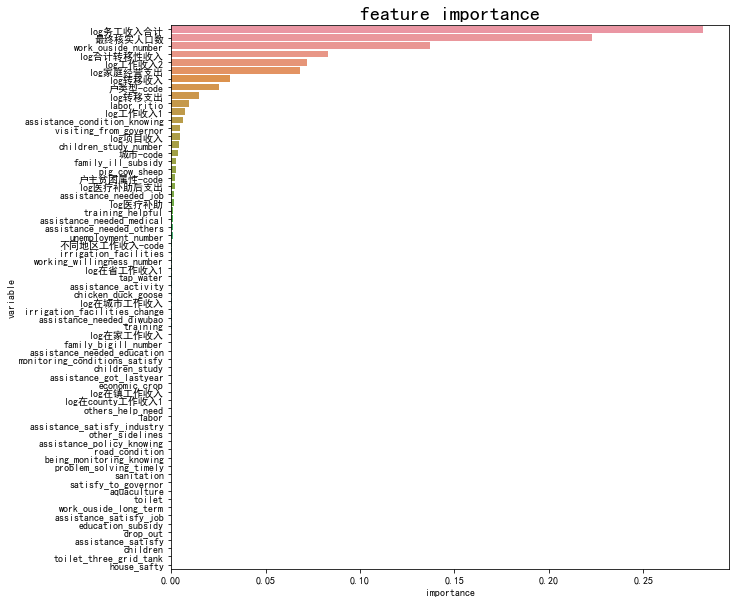

,variable,importance
54,log务工收入合计,0.281350
45,最终核实人口数,0.222587
12,work_ouside_number,0.137133
56,log合计转移性收入,0.083143
48,log工作收入2,0.071993
46,log家庭经营支出,0.068429
57,log转移收入,0.031241
63,户类型-code,0.025628
60,log转移支出,0.014596
61,labor_ritio,0.009254


In [123]:
#定义决策树模型
dtc = DecisionTreeRegressor(random_state=20)
#在训练集上训练模型
dtc.fit(training_inputs, training_classes)
importance=list(dtc.feature_importances_)

impd = pd.DataFrame(list(zip(data.columns, importance)),
                   columns=['variable', 'importance'])

# 按照重要性降序排序
impd = impd.sort_values(by='importance', ascending=False)

# 选择前20个重要的变量
top_20_features = impd.head(20)
#特征重要性可视化
plt.figure(figsize=(10,10))
sns.barplot(impd['importance'],impd['variable'])

plt.title("feature importance",fontsize=20)
plt.show()
top_20_features

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_test1 = {
    'max_features': [i for i in range(4, len(data.columns) + 1)],
    'max_depth': [i for i in range(3, 6)],
    'min_samples_leaf': [i for i in range(10, 200, 50)]
}

X = all_inputs
y = all_outputs

gsearch = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=20),
    param_grid=param_test1,
    refit=True,
    cv=5
)

gsearch.fit(X, y)

grid = {
    "best_params": gsearch.best_params_,
    "best_score": gsearch.best_score_,
    "cv_results": gsearch.cv_results_,
    "best_estimator": gsearch.best_estimator_,
    "best_index": gsearch.best_index_,
    "scorer": gsearch.scorer_,
}

print(gsearch.best_params_, gsearch.best_score_)


{'max_depth': 5, 'max_features': 63, 'min_samples_leaf': 10} 0.5044896176270636


In [ ]:
# 划分训练集测试集
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.5, random_state=1)


#创建随机森林分类器对象
rf = RandomForestClassifier(random_state=0,
                            n_estimators=100,
                            oob_score=True)  #袋外误差
#训练模型
model= rf.fit(training_inputs,training_classes)

#查看袋外误差
print(rf.oob_score_)

#模型在测试集上的表现
print(rf.score(testing_inputs,testing_classes))


###展示图

In [ ]:
#决策树特征重要性

#定义决策树模型
dtc = DecisionTreeClassifier(random_state=20)
#在训练集上训练模型
dtc.fit(training_inputs, training_classes)
importance=list(dtc.feature_importances_)
impd=pd.DataFrame(list(zip(data.columns,importance)), 
                   columns = ['variable', 'importance'])
impd

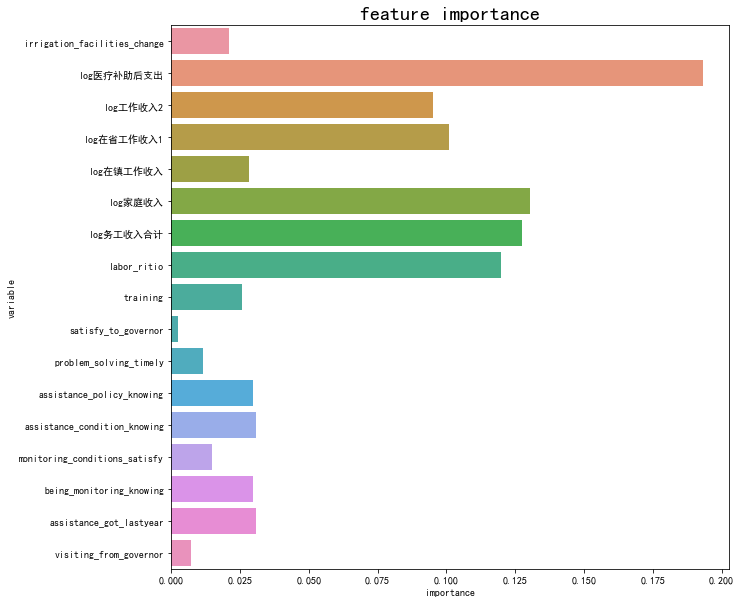

In [157]:
#特征重要性可视化
plt.figure(figsize=(10,10))
sns.barplot(impd['importance'],impd['variable'])

plt.title("feature importance",fontsize=20)
plt.show()

In [124]:
# 使用gridsearch的方法调参
from sklearn.model_selection import GridSearchCV

In [ ]:
#设置参数空间
param_test1 = {'max_features':range(4,len(data.columns)+1),   #使用多少feature来预测
               'max_depth':range(3,6,1),        # 树的深度      
               'min_samples_leaf':range(10,200,50),  #叶子最小样本数
               }

X=all_inputs
y=all_outputs

grid=[]
gsearch = GridSearchCV(
           estimator = DecisionTreeClassifier(
                                              random_state=20,        
                                              #min_samples_leaf=30

                                              ), 
                   param_grid = param_test1,          
                   refit=True,
                   #scoring='roc_auc',                   
                   cv=10)  # 十折交叉验证
#拟合模型
gsearch.fit(X,y)
#保存结果
grid={"best_params":gsearch.best_params_, 
          "best_score":gsearch.best_score_,
          "cv_results":gsearch.cv_results_,
          "best_estimator":gsearch.best_estimator_,
          "best_index":gsearch.best_index_,
          "scorer":gsearch.scorer_,
          #"feature_names":feature_names_in_
          }

#打印最好模型的参数设置和准确性
print(gsearch.best_params_, gsearch.best_score_)



In [1]:
import shap
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


In [18]:
data.shape

(1592, 18)

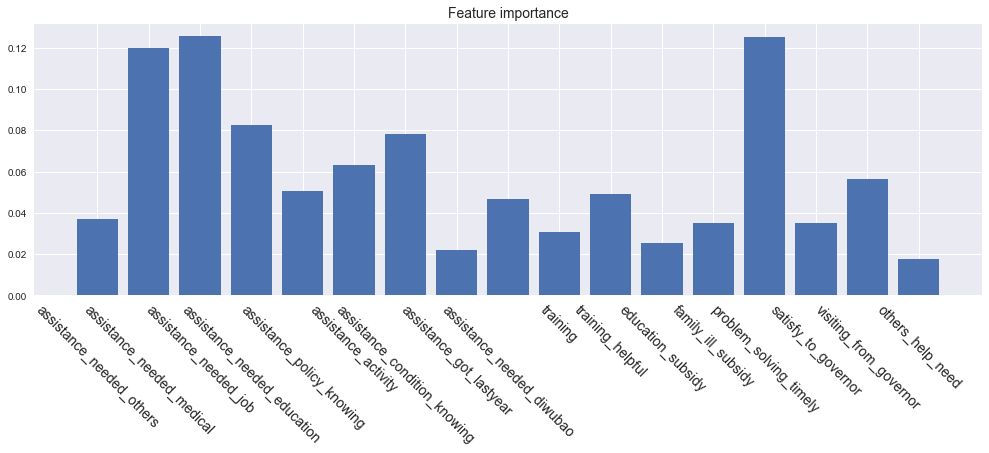

In [16]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

# 读取数据，目标变量y是球员的身价（万欧元）
data = pd.read_excel('D://作业//低保户//gover_living.xlsx')

# 数据清理：处理缺失值
data = data.dropna()

# 选择特征，这里只是举例，未必是最佳组合
cols = ['assistance_needed_others', 'assistance_needed_medical',
       'assistance_needed_job', 'assistance_needed_education',
       'assistance_policy_knowing', 'assistance_activity',
       'assistance_condition_knowing', 'assistance_got_lastyear',
       'assistance_needed_diwubao', 'training', 'training_helpful',
       'education_subsidy', 'family_ill_subsidy', 'problem_solving_timely',
       'satisfy_to_governor', 'visiting_from_governor', 'others_help_need']

y = data['living_stable']

# 训练xgboost回归模型
model = xgb.XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=150)
model.fit(data[cols], y)

# 获取feature importance
plt.figure(figsize=(17, 5))
plt.bar(range(len(cols)), model.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()

In [20]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data[cols])
print(shap_values.shape)

(1592, 17)


(1592, 17)

In [21]:
y_base = explainer.expected_value
print(y_base)

data['pred'] = model.predict(data[cols])
print(data['pred'].mean())

3.8238795
3.8238783


In [22]:
#单个# 比如我们挑选数据集中的第30位
j = 30
player_explainer = pd.DataFrame()
player_explainer['feature'] = cols
player_explainer['feature_value'] = data[cols].iloc[j].values
player_explainer['shap_value'] = shap_values[j]
player_explainer
print('y_base + sum_of_shap_values: %.2f'%(y_base + player_explainer['shap_value'].sum()))
print('y_pred: %.2f'%(data['pred'].iloc[j]))
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[j], data[cols].iloc[j])

y_base + sum_of_shap_values: 3.63
y_pred: 3.63


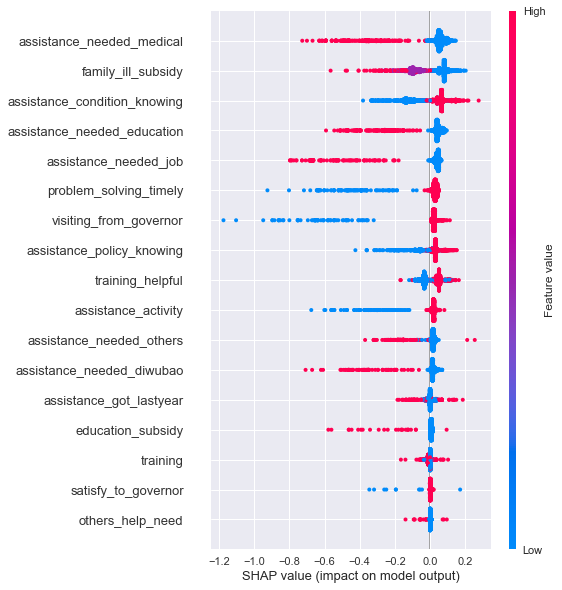

In [23]:
shap.summary_plot(shap_values, data[cols])

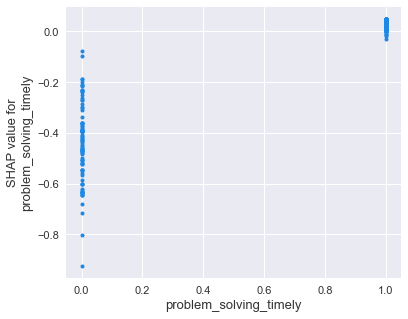

In [26]:
shap.dependence_plot('problem_solving_timely', shap_values, data[cols], interaction_index=None, show=False)

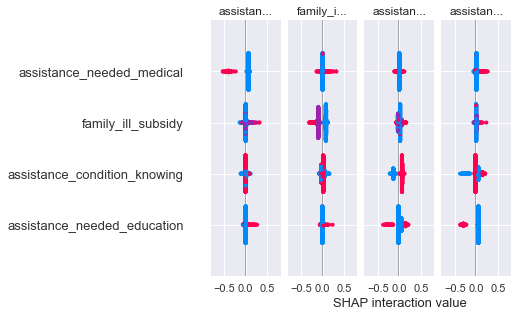

In [27]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(data[cols])
shap.summary_plot(shap_interaction_values, data[cols], max_display=4)

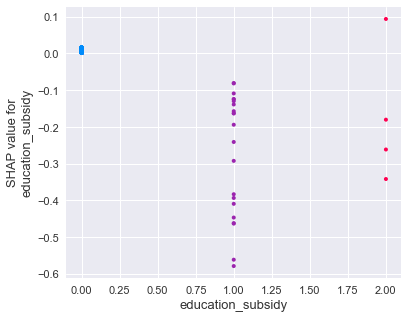

In [30]:
shap.dependence_plot('education_subsidy', shap_values, data[cols], interaction_index='education_subsidy', show=False)